In [1]:
import pymongo
from spearmint.utils import compression
from spearmint.utils import functions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from spearmint.tasks import input_space
sns.set()

In [2]:
import matlab.engine
import matlab
from scipy import io

In [3]:
sns.set()

In [4]:
case = 0

In [5]:
mat_file = io.loadmat("Spec_CD.mat")

In [6]:
O_spec = mat_file["GN_spec"]
real_X = mat_file["S_x"]

In [7]:
real_X = real_X[case]
O_spec = O_spec[case]

In [8]:
mongo_conn = pymongo.MongoClient('127.0.0.1',27017)
mongo_conn.list_database_names()

mongo_db = mongo_conn['spearmint']

In [9]:
collection_list = mongo_db.list_collection_names()

In [10]:
exp_name = 'mse_rcwa_case0'

In [11]:
jobs_EI_exp = []
jobs_Mk10_EI_exp = []

recomm_EI_exp = []
recomm_Mk10_EI_exp = []

if "%s_test.jobs"%(exp_name) in collection_list: jobs_EI_exp.append(mongo_db["%s_test.jobs"%(exp_name)])
if "%s_Mk10_EI.jobs"%(exp_name) in collection_list: jobs_Mk10_EI_exp.append(mongo_db["%s_Mk10_EI.jobs"%(exp_name)])
if "%s_test.recommendations"%(exp_name) in collection_list: recomm_EI_exp.append(mongo_db["%s_test.recommendations"%(exp_name)])
if "%s_Mk10_EI.recommendations"%(exp_name) in collection_list: recomm_Mk10_EI_exp.append(mongo_db["%s_Mk10_EI.recommendations"%(exp_name)])
for i in range(1,4):
    if "%s_test-%d.jobs"%(exp_name,i) in collection_list: jobs_EI_exp.append(mongo_db["%s_test-%d.jobs"%(exp_name,i)])
        
    if "%s_test-%d.recommendations"%(exp_name,i) in collection_list: recomm_EI_exp.append(mongo_db["%s_test-%d.recommendations"%(exp_name,i)])

In [29]:
jobs_Mk10_EI_exp[0]

Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), u'spearmint'), u'mse_rcwa_case0_Mk10_EI.jobs')

In [32]:
locs_EI_exp = functions.get_recomm_obs_loc(recomm_EI_exp)
locs_Mk10_EI_exp = functions.get_recomm_obs_loc(recomm_Mk10_EI_exp)

observed_obj_EI_exp = functions.observed_obj(recomm_EI_exp)

In [18]:
real_X

array([  19.37422588,   21.98265885,   24.39183805,   26.94798671,
       1650.50254819])

In [19]:
locs_EI_exp[0][0]

[19.156541128962377,
 19.448503191249145,
 23.835081422697613,
 26.703499705857876,
 1290.908779884152]

In [20]:
real_X - locs_EI_exp[0][0]

array([2.17684749e-01, 2.53415566e+00, 5.56756626e-01, 2.44487001e-01,
       3.59593768e+02])

In [21]:
real_X

array([  19.37422588,   21.98265885,   24.39183805,   26.94798671,
       1650.50254819])

In [22]:
locs_EI_exp[0][499]

[19.333078096259012,
 21.407427777248238,
 24.259984811495386,
 26.78966276426745,
 1657.5963167932055]

In [23]:
def get_abs_error(real_X, locs_exp):
    error_exp = []
    for exp_num in range(len(locs_exp)):
        error_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for idx in range(len(locs_cur_exp)):
            error = real_X - locs_cur_exp[idx]
            error = np.abs(error)
            error_iter.append(error)
            
        error_exp.append(error_iter)
    return error_exp

In [24]:
error_EI_exp = get_abs_error(real_X, locs_EI_exp)
error_Mk10_EI_exp = get_abs_error(real_X, locs_Mk10_EI_exp)

In [ ]:
theta1_abs_error = [item[0] for item in error_EI_exp[3]]
theta2_abs_error = [item[1] for item in error_EI_exp[3]]
theta3_abs_error = [item[2] for item in error_EI_exp[3]]
theta4_abs_error = [item[3] for item in error_EI_exp[3]]
theta5_abs_error = [item[4] for item in error_EI_exp[3]]

### Mk10 case

In [ ]:
theta1_Mk10_EI_abs_error = [item[0] for item in error_Mk10_EI_exp[0]]
theta2_Mk10_EI_abs_error = [item[1] for item in error_Mk10_EI_exp[0]]
theta3_Mk10_EI_abs_error = [item[2] for item in error_Mk10_EI_exp[0]]
theta4_Mk10_EI_abs_error = [item[3] for item in error_Mk10_EI_exp[0]]
theta5_Mk10_EI_abs_error = [item[4] for item in error_Mk10_EI_exp[0]]

In [ ]:
sns.set()

In [ ]:
plt.figure()
plt.plot(theta1_abs_error)
plt.show()

In [ ]:
plt.figure()
plt.plot(theta2_abs_error)
plt.show()

In [ ]:
plt.figure()
plt.plot(theta3_abs_error)
plt.show()

In [ ]:
plt.figure()
plt.plot(theta4_abs_error)
plt.show()

In [ ]:
plt.figure()
plt.plot(theta5_abs_error)
plt.show()

In [ ]:
real_X

## Mk10 Case

In [ ]:
plt.figure()
plt.plot(theta1_Mk10_EI_abs_error)
plt.show()

In [ ]:
plt.figure()
plt.plot(theta2_Mk10_EI_abs_error)
plt.show()

In [ ]:
plt.figure()
plt.plot(theta3_Mk10_EI_abs_error)
plt.show()

In [ ]:
plt.figure()
plt.plot(theta4_Mk10_EI_abs_error)
plt.show()

In [ ]:
plt.figure()
plt.plot(theta5_Mk10_EI_abs_error)
plt.show()

In [41]:
test = np.multiply(observed_obj_EI_exp[0],303)

In [39]:
len(observed_obj_EI_exp[0])

500

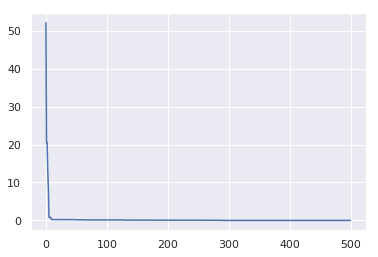

In [42]:
plt.plot(test)

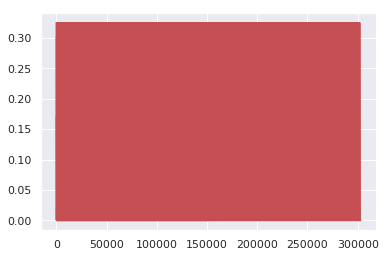

In [35]:
plt.plot(observed_obj_EI_exp[0] * 303)
plt.plot(observed_obj_EI_exp[1] * 303)
plt.plot(observed_obj_EI_exp[2] * 303)
plt.plot(observed_obj_EI_exp[3] * 303)